In [3]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, LogisticRegression, ElasticNet, LinearRegression
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, KFold
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, roc_auc_score, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, VotingRegressor, BaggingClassifier, BaggingRegressor

import warnings
warnings.filterwarnings('ignore')

In [5]:
cancer = pd.read_csv("BreastCancer.csv", index_col=0)
x = cancer.drop('Class', axis = 1)
y = cancer['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    random_state = 24, 
                                                    test_size = 0.3,
                                                   stratify = y,
                                                   )

In [7]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 24)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9666666666666667


In [9]:
y_pred_prob = rf.predict_proba(x_test)[:,1]
print(roc_auc_score(y_test, y_pred_prob))

0.9938607085346216


# Glass Identification dataset

In [34]:
glass.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed


In [12]:
glass = pd.read_csv("Glass.csv")
x = glass.drop('Type', axis = 1)
y = glass['Type']
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    random_state = 24, 
                                                    test_size = 0.3,
                                                   stratify = y,
                                                   )

In [14]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 24)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.7538461538461538


In [16]:
y_pred_prob = rf.predict_proba(x_test)[:,1]
print(roc_auc_score(y_test, y_pred_prob))

ValueError: multi_class must be in ('ovo', 'ovr')

In [26]:


# ______________________________________________________________________________________
# Pipeline

# one hot encoder
ohe = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=False,
    drop='first'
).set_output(transform='pandas')

trans_ohe = make_column_transformer(
    ('passthrough', make_column_selector(dtype_exclude=['category', object])),
    (ohe, make_column_selector(dtype_include=['category', object])),
    verbose_feature_names_out=False
).set_output(transform='pandas')


# scaler
scl_std = StandardScaler().set_output(transform = "pandas")
scl_mm = MinMaxScaler().set_output(transform = "pandas")


# Model

rf = RandomForestClassifier()

pipe = Pipeline([("RF", rf)])


# _____________________________________________________________________________________
# GCV

params = {
    "RF__max_features" : [3, 4, 5],
    "RF__n_estimators" : [10, 50, 100]
}

kfolds = StratifiedKFold(n_splits = 5,
                        random_state = 24,
                        shuffle = True)

kfold = KFold(n_splits = 5,
            random_state = 24,
            shuffle = True)

gcv = GridSearchCV(pipe,
                  param_grid = params,
                  scoring = "neg_log_loss",
                  cv = kfolds,
                  verbose = 3)


# gcv.fit(x, y)

In [28]:
gcv.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END RF__max_features=3, RF__n_estimators=10;, score=-1.793 total time=   0.0s
[CV 2/5] END RF__max_features=3, RF__n_estimators=10;, score=-1.764 total time=   0.0s
[CV 3/5] END RF__max_features=3, RF__n_estimators=10;, score=-1.924 total time=   0.0s
[CV 4/5] END RF__max_features=3, RF__n_estimators=10;, score=-0.668 total time=   0.0s
[CV 5/5] END RF__max_features=3, RF__n_estimators=10;, score=-0.673 total time=   0.0s
[CV 1/5] END RF__max_features=3, RF__n_estimators=50;, score=-0.666 total time=   0.0s
[CV 2/5] END RF__max_features=3, RF__n_estimators=50;, score=-0.574 total time=   0.0s
[CV 3/5] END RF__max_features=3, RF__n_estimators=50;, score=-0.757 total time=   0.0s
[CV 4/5] END RF__max_features=3, RF__n_estimators=50;, score=-0.723 total time=   0.0s
[CV 5/5] END RF__max_features=3, RF__n_estimators=50;, score=-0.771 total time=   0.0s
[CV 1/5] END RF__max_features=3, RF__n_estimators=100;, score=-0.722 t

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('RF', RandomForestClassifier())]),
             param_grid={'RF__max_features': [3, 4, 5],
                         'RF__n_estimators': [10, 50, 100]},
             scoring='neg_log_loss', verbose=3)

In [30]:
gcv.best_score_

-0.6811161039646663

In [32]:
y_pred = gcv.predict(x_test)
accuracy_score(y_test, y_pred)

0.7538461538461538

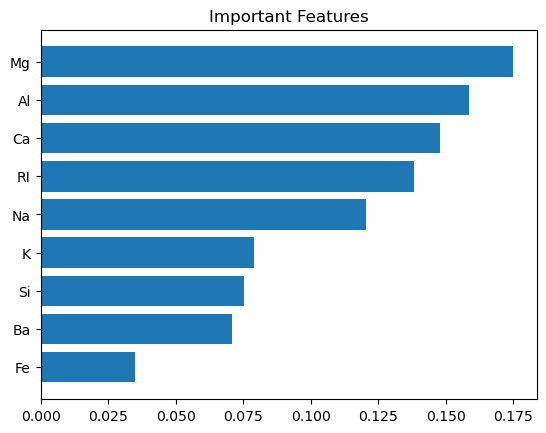

In [38]:
glass_imp = pd.DataFrame({'feature': list(x),
                         'importance' : gcv.best_estimator_[0].feature_importances_})
glass_imp.sort_values('importance', inplace=True)
plt.barh(glass_imp['feature'], glass_imp['importance'])
plt.title("Important Features")
plt.show()